# Ali Flu Project 10x - B cells from FNA Samples from P04, P05 and P11 (Year 1 and Year 2) without integration
* Hailong

In [1]:
## load libraries ####
rm(list=ls())
start_time <- Sys.time()
suppressPackageStartupMessages(library("dplyr"))
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("Seurat"))
suppressPackageStartupMessages(library("cowplot"))
suppressPackageStartupMessages(library("pheatmap"))
suppressPackageStartupMessages(library("RColorBrewer"))
suppressPackageStartupMessages(library("Matrix"))
suppressPackageStartupMessages(library("alakazam"))
suppressPackageStartupMessages(library("tidyr"))
suppressPackageStartupMessages(library("gridExtra"))
suppressPackageStartupMessages(library("grid"))
suppressPackageStartupMessages(library("scales"))
sampleCat = "FNA"
path.work = file.path("D:","Storage","Ali","manuscript","supplFigures","FNA")
path.data = file.path("C:","Project","workspace", "AliFlu","10x", "data")
path.data2 = file.path("D:","Storage","Ali","10x", "Year2", "GEX", sampleCat)
setwd(path.work)
feature.cols = c("lightgray", "blue")

# Load mappings
mapping.file = file.path(path.data, "data_mapping", "map_GEX.txt")
mappings = read.delim(mapping.file, stringsAsFactors = FALSE, as.is=T)
mappings = filter(mappings, SampleType == "FNA")
dim(mappings)

[1] 47  8

In [2]:
immune.combined = readRDS(file.path(path.data2, "FNA_B_beforeAnnotation.GEX.rds"))

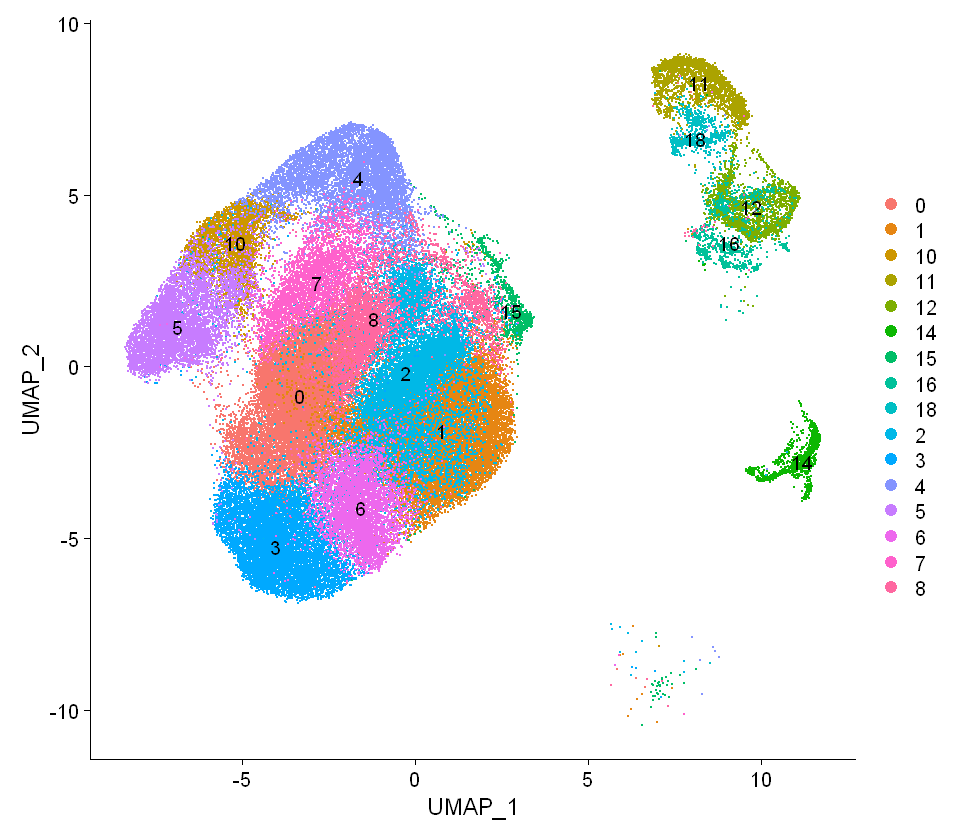

In [3]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(object = immune.combined, reduction = "umap", label = TRUE)

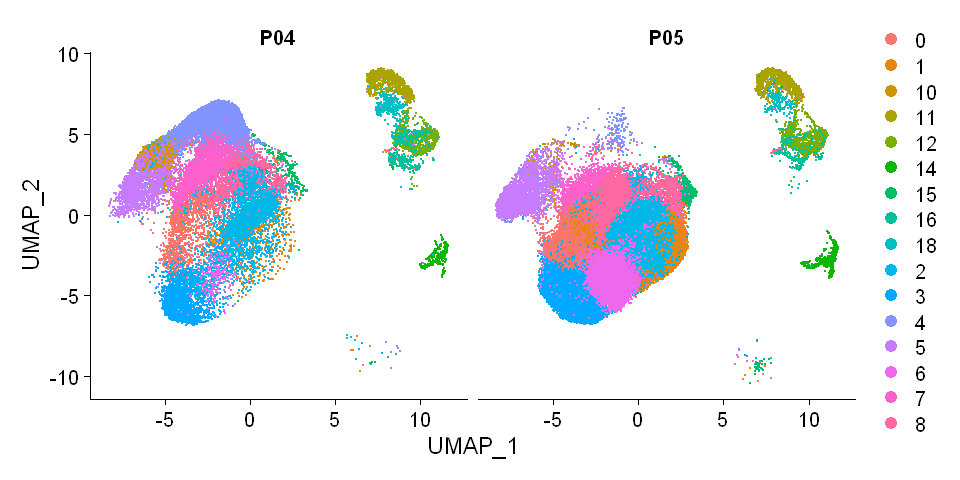

In [4]:
options(repr.plot.width=8, repr.plot.height=4)
DimPlot(object = immune.combined, reduction = "umap", split.by = "subject")

In [5]:
pdf("UMAP_FNA_B_beforeAnnotation.pdf", width=5, height=4, useDingbats=FALSE)
DimPlot(object = immune.combined, reduction = "umap", label = FALSE)
dev.off()

png 
  2

In [6]:
pdf("UMAP_FNA_B_beforeAnnotation_bySubject.pdf", width=8, height=4, useDingbats=FALSE)
DimPlot(object = immune.combined, reduction = "umap", split.by = "subject")
dev.off()

png 
  2

## Check marker genes

In [7]:
B <- c("MS4A1", "IGKC","CD79A", "CD79B", "CD19")
RMB <- c("TNFRSF13B", "CD27", "CD24") #Resting Memory B
naive.B <- c("TCL1A", "IL4R",  "CCR7", "IGHM", "IGHD") #Naive B
plasma <- c("CD38", "CD27","FKBP11","TRIB1","SDC1","XBP1", "IRF4", "SEC11C", "JCHAIN", "PRDM1")
GC.B <- c("BCL6", "RGS13", "MEF2B", "STMN1", "ELL3", "SERPINA9")
ABC <- c("TBX21", "FCRL5", "ITGAX", "NKG7", "ZEB2", "CR2")# the lack of CR2 for activated B cells (ABCs);
T <- c("CD3D", "CD3E","CD4", "IL7R", "CD8A")
NK <- c("GZMB", "GNLY", "NKG7", "NCAM1")
CD14.Monocyte <-c("CD14","LYZ")
DC <- c("FCER1A", "CST3")
platlet <- "PPBP"
dividing  <- c("MKI67", "CDK1") # Dividing cells 
  
# BCL6, RGS13, MEF2B, STMN1, ELL3 and SERPINA9 for GC B cells;  
# XBP1, IRF4, SEC11C,FKBP11, JCHAIN and PRDM1 for PBs; 
# TCL1A, IL4R, CCR7, IGHM, and IGHD for naive B cells; 
# TBX21, FCRL5, ITGAX, NKG7, ZEB2, and the lack of CR2 for activated B cells; 
# TNFRSF13B, CD27 and CD24 for RMB cells.
all.B = c("BCL6", "RGS13", "MEF2B", "STMN1", "ELL3", "SERPINA9", 
          "XBP1", "IRF4", "SEC11C","FKBP11", "JCHAIN", "PRDM1", 
            "TCL1A", "IL4R", "CCR7", "IGHM", "IGHD",
            "TBX21", "FCRL5", "ITGAX", "NKG7", "ZEB2","CR2", 
            "TNFRSF13B", "CD27", "CD24")          

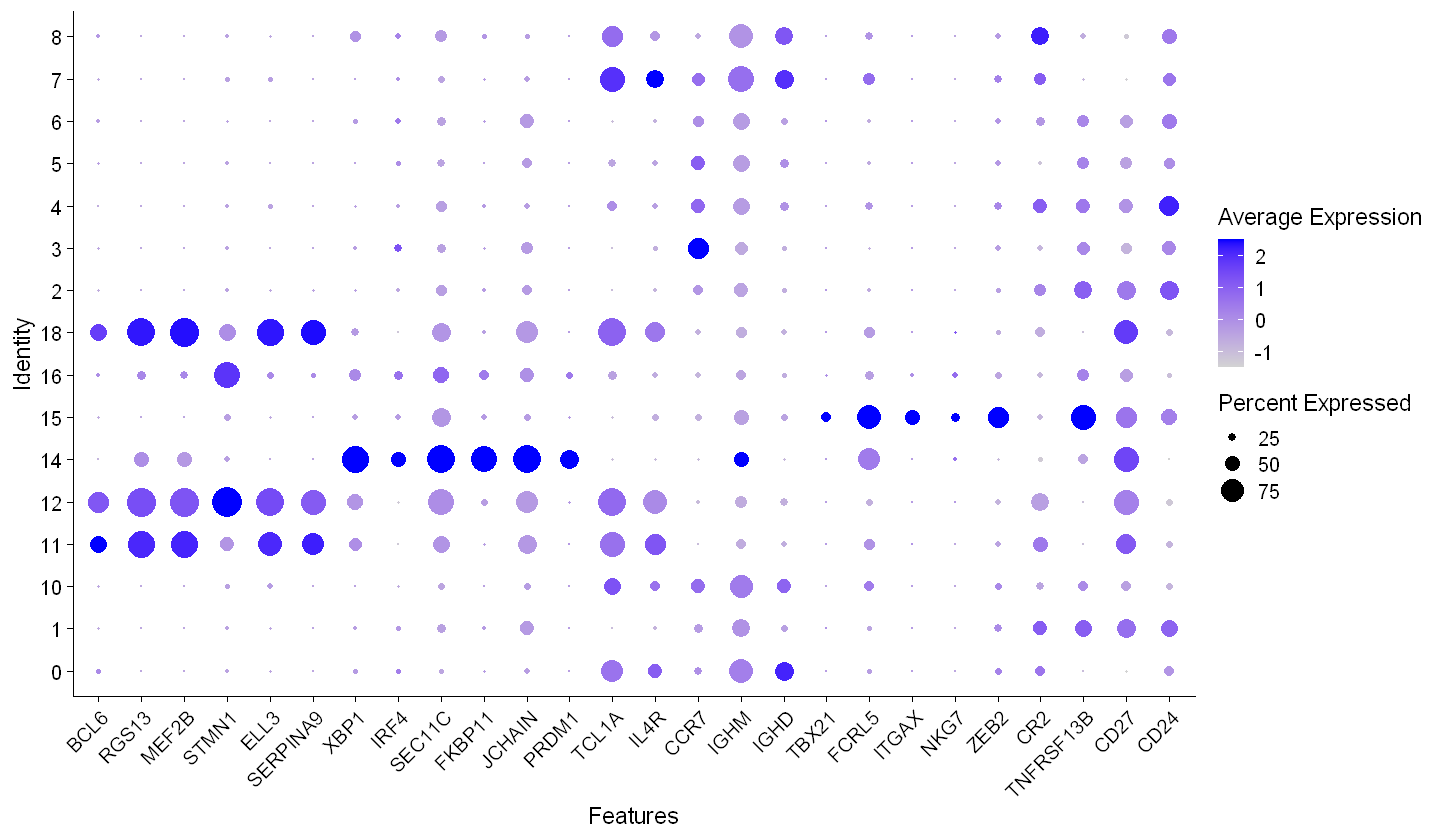

In [9]:
options(repr.plot.width=12, repr.plot.height=7)
DotPlot(immune.combined, assay = "RNA", features =  unique(all.B), dot.scale = 8) + RotatedAxis()

In [11]:
pdf("DotPlot_FNA_B_beforeAnnotation.pdf", width=8, height=4, useDingbats=FALSE)
DotPlot(immune.combined, assay = "RNA", features =  unique(all.B), dot.scale = 5) + RotatedAxis()
dev.off()

png 
  2

In [12]:
levels(x = immune.combined)

[1] "0"  "1"  "10" "11" "12" "14" "15" "16" "18" "2"  "3"  "4"  "5"  "6"  "7" 
[16] "8"

In [13]:
#0,7,8,10: Naive
#11,12,18: GC
#15: ABC
#16 and the rest: RMB
#14:PB
new.cluster.ids <- c("Naive", "RMB","Naive", "GC","GC","PB","ABC",#0,1,10,11,12,14,15,
                     "RMB","GC","RMB", "RMB","RMB","RMB","RMB","Naive","Naive",# 16, 18,2,3,4,5,6,7,8  
                     "PB"#17
                    )
names(x = new.cluster.ids) <- levels(x = immune.combined)
immune.combined <- RenameIdents(object = immune.combined, new.cluster.ids)

Warning message:
"Cannot find identity NA"


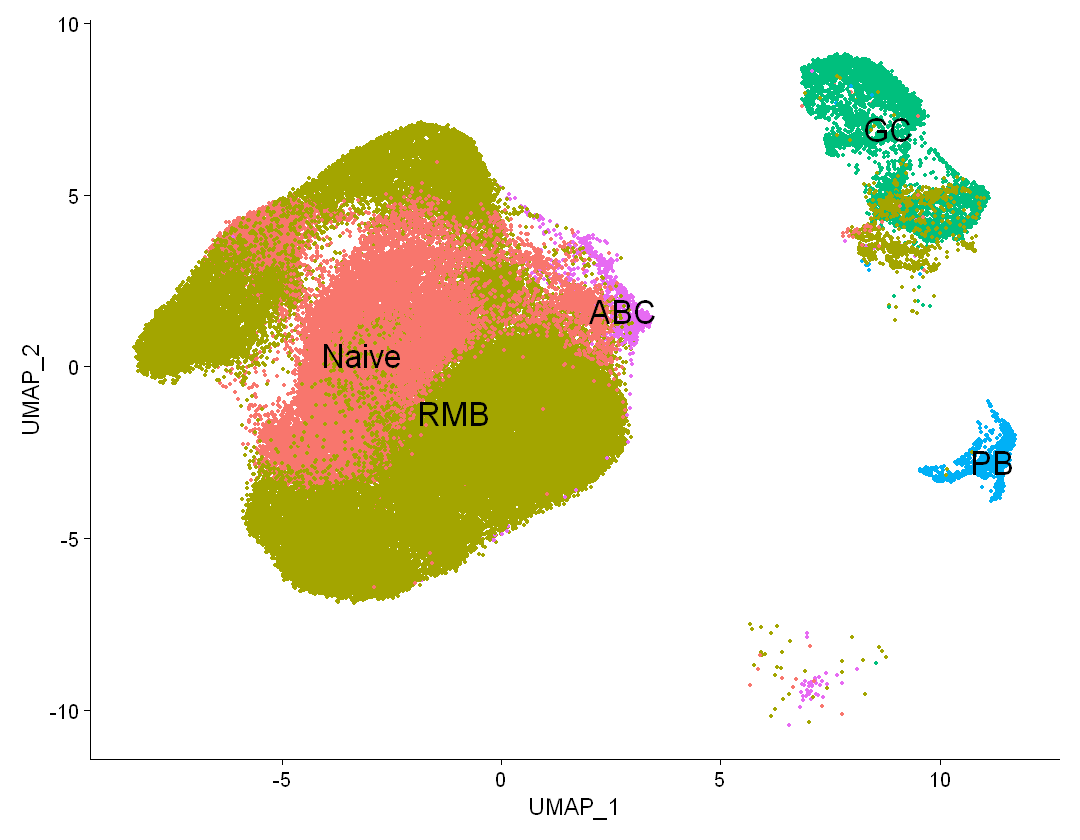

In [14]:
options(repr.plot.width=9, repr.plot.height=7)
DimPlot(object = immune.combined, reduction = "umap", label = TRUE, pt.size = 0.8,label.size=7) + NoLegend()

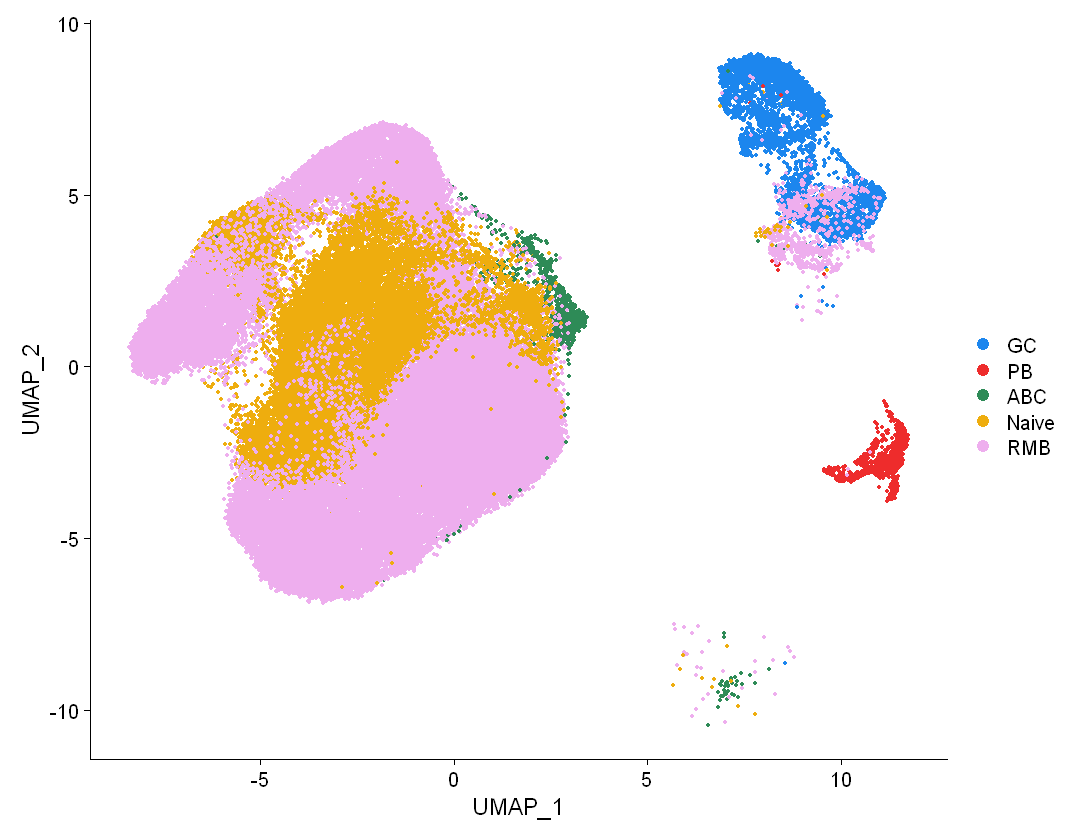

In [25]:
options(repr.plot.width=9, repr.plot.height=7)
DimPlot(object = immune.combined, reduction = "umap", pt.size = 0.8,
       cols = c("GC"="dodgerblue2", "PB"="firebrick2", "ABC"="seagreen", 
                     "Naive"="darkgoldenrod2", "RMB"="plum2")) 

In [27]:
pdf("UMAP_FNA_B.pdf", width=5, height=4, useDingbats=FALSE)
DimPlot(object = immune.combined, reduction = "umap", 
        cols = c("GC"="dodgerblue2", "PB"="firebrick2", "ABC"="seagreen", 
                     "Naive"="darkgoldenrod2", "RMB"="plum2"),label = FALSE)
dev.off()

png 
  2

In [28]:
pdf("UMAP_FNA_B_bySubject.pdf", width=8, height=4, useDingbats=FALSE)
DimPlot(object = immune.combined, reduction = "umap", 
        cols = c("GC"="dodgerblue2", "PB"="firebrick2", "ABC"="seagreen", 
                     "Naive"="darkgoldenrod2", "RMB"="plum2"),
        split.by = "subject")
dev.off()

png 
  2

In [17]:
pdf("DotPlot_FNA_B.pdf", width=8, height=3, useDingbats=FALSE)
DotPlot(immune.combined, assay = "RNA", features =  unique(all.B), dot.scale = 5) + RotatedAxis()
dev.off()

png 
  2

In [18]:
path.data = file.path("D:","Storage","Ali","10x","Year2","mergeBCR","data_v2")
BCR.Y1Y2.P04 = read.table(paste0(path.data, "/P04_BCR.tsv"), header=TRUE, sep="\t",as.is=T,stringsAsFactors = FALSE)
BCR.Y1Y2.P05 = read.table(paste0(path.data, "/P05_BCR.tsv"), header=TRUE, sep="\t",as.is=T,stringsAsFactors = FALSE)

BCR.Y1Y2.P04 = BCR.Y1Y2.P04 %>% 
        dplyr::filter(SAMPLETYPE == "FNA" & DATATYPE == "singleCell")
BCR.Y1Y2.P05 = BCR.Y1Y2.P05 %>% 
        dplyr::filter(SAMPLETYPE == "FNA" & DATATYPE == "singleCell")

BCR.Y1Y2 = rbind(BCR.Y1Y2.P04, BCR.Y1Y2.P05)

Warning message in read.table(paste0(path.data, "/P04_BCR.tsv"), header = TRUE, :
"not all columns named in 'as.is' exist"
Warning message in read.table(paste0(path.data, "/P05_BCR.tsv"), header = TRUE, :
"not all columns named in 'as.is' exist"


In [19]:
BCR.Y1Y2$CELL = as.character(BCR.Y1Y2$CELL)
BCR.Y1Y2 = BCR.Y1Y2 %>% rowwise() %>%
            mutate(BARCODE = paste(SAMPLE, strsplit(CELL, split = "-")[[1]][1], sep = "_"))

b_cell.BM <- unique((BCR.Y1Y2 %>%
            filter(BARCODE %in% Cells(immune.combined)))$BARCODE)

length(b_cell.BM)

[1] 75564

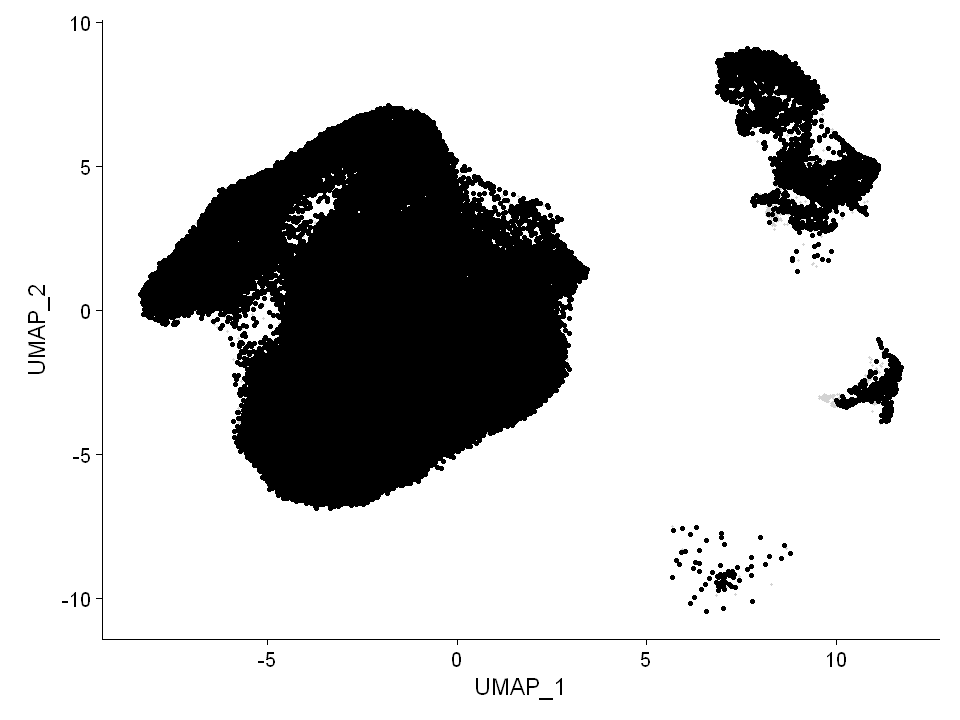

In [30]:
options(repr.plot.width=8, repr.plot.height=6)
DimPlot(object = immune.combined, reduction = "umap", cells.highlight = b_cell.BM, 
       # pt.size = 0.5,label.size=6, cols="black") + NoLegend()
cols.highlight="black", pt.size = 0.5,label.size=6, cols="lightgray") + NoLegend()

In [20]:
pdf("BCRonGEX_FNA_B.pdf", width=5, height=4, useDingbats=FALSE)
DimPlot(object = immune.combined, reduction = "umap", cells.highlight = b_cell.BM, 
        pt.size = 0.5,label.size=6, cols="black") + NoLegend()
dev.off()

png 
  2